# Exercise 1: Divisive clustering via Girvan–Newman

In [3]:
import networkx as nx

In [5]:
def step1(G, root):
    visited, queue = [], []
    shortest_path ={}

    visited.append(root)
    queue.append((root,[root]))
    while queue:
        q, path = queue.pop()
        
        
        for n in G.neighbors(q):
            if n == root:
                continue
            if n not in visited:
                visited.append(n)
                queue.append((n,path+[n]))
                shortest_path[n] = [path+[n]]
            else:
                if len(path)+1 == len(shortest_path[n][0]):
                    shortest_path[n].append((path+[n]))
    return shortest_path

In [7]:
def step2(G,dict):
    dis = {}
    for n in G.nodes():
        if n in dict.keys():
            dis[n] = len(dict[n])
        else:
            dis[n] = 0
    
    return dis

In [9]:
def step3(G, path, e):
    br_e = 0
    start, end = e
    for n in path.keys():
        edge = 0
        shortest = path[n]
        for p in shortest:
            if start in p and end in p:
                edge+=1
        br_e +=edge/len(shortest)
            
    
    return br_e

In [11]:
def between(G, e):
    br = 0
    for n in G.nodes():
        path_dict = step1(G, n)
        br += step3(G, path_dict, e)
    return 1/2*br

In [42]:
def Girvan_Newman(G):
    while len(G.edges()) > 0:
        betweenness = []
        for e in G.edges:
            betweenness.append([e, between(G, e)])
        betweenness.sort(key=lambda x:x[1], reverse=True)
        G.remove_edge(betweenness[0][0][0],betweenness[0][0][1])
        print(G.edges())

Nb nodes: n = 8
Nb edges: m = 10
[('A', 'H'), ('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'G'), ('D', 'E'), ('D', 'F'), ('E', 'F'), ('F', 'G')]
[('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'G'), ('D', 'E'), ('D', 'F'), ('E', 'F'), ('F', 'G')]
[('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'), ('D', 'F'), ('E', 'F'), ('F', 'G')]
[('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'), ('D', 'F'), ('E', 'F')]
[('A', 'C'), ('B', 'C'), ('D', 'E'), ('D', 'F'), ('E', 'F')]
[('B', 'C'), ('D', 'E'), ('D', 'F'), ('E', 'F')]
[('D', 'E'), ('D', 'F'), ('E', 'F')]
[('D', 'F'), ('E', 'F')]
[('E', 'F')]
[]


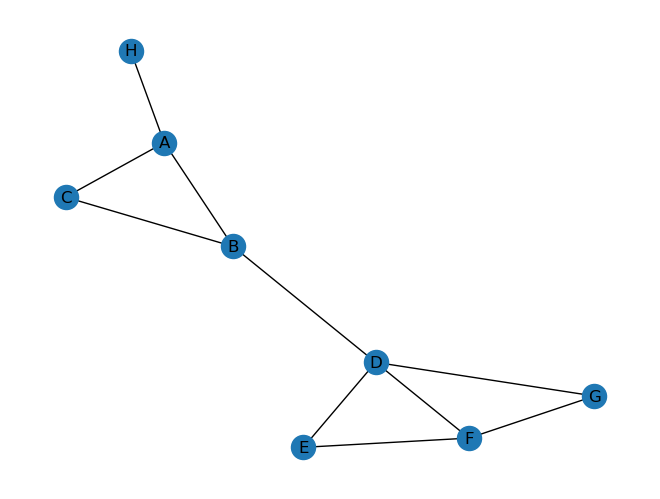

In [43]:
graph = nx.Graph()

nodes = ['A','B','C','D','E','F','G','H']
graph.add_nodes_from(nodes)
edges = [
    ('A','H'), ('A','B'), ('A','C'), 
    ('B','C'), ('B','D'), ('D','G'), 
    ('D','E'), ('D','F'), ('G','F'), 
    ('F','E')
]
graph.add_edges_from(edges)
n, m = len(graph.nodes()), len(graph.edges())
print('Nb nodes: n =', n)
print('Nb edges: m =', m)
nx.draw(graph,with_labels=True)

Girvan_Newman(graph)

In [ ]:
nx.algorithms.centrality.edge_betweenness_centrality(graph)

{('A', 'H'): 0.25,
 ('A', 'B'): 0.3571428571428571,
 ('A', 'C'): 0.07142857142857142,
 ('B', 'C'): 0.17857142857142855,
 ('B', 'D'): 0.5714285714285714,
 ('D', 'G'): 0.19642857142857142,
 ('D', 'E'): 0.19642857142857142,
 ('D', 'F'): 0.17857142857142855,
 ('E', 'F'): 0.05357142857142857,
 ('F', 'G'): 0.05357142857142857}

In [ ]:
comp = nx.algorithms.community.girvan_newman(graph)
community = tuple(sorted(c) for c in next(comp))
print(community)

(['A', 'B', 'C', 'H'], ['D', 'E', 'F', 'G'])


In [ ]:
nx.algorithms.community.modularity(graph, community)


0.395